<a href="https://colab.research.google.com/github/CoweiChou/Transformers/blob/main/segformer_b2_clothes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers


/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/image_processing_segformer.py:100: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


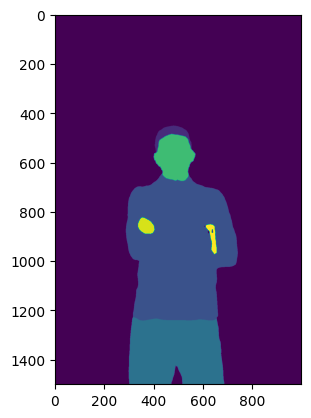

In [3]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch.nn as nn

processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")

url = "https://plus.unsplash.com/premium_photo-1673210886161-bfcc40f54d1f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8cGVyc29uJTIwc3RhbmRpbmd8ZW58MHx8MHx8&w=1000&q=80"

image = Image.open(requests.get(url, stream=True).raw)
inputs = processor(images=image, return_tensors="pt")

outputs = model(**inputs)
logits = outputs.logits.cpu()

upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

pred_seg = upsampled_logits.argmax(dim=1)[0]
plt.imshow(pred_seg)


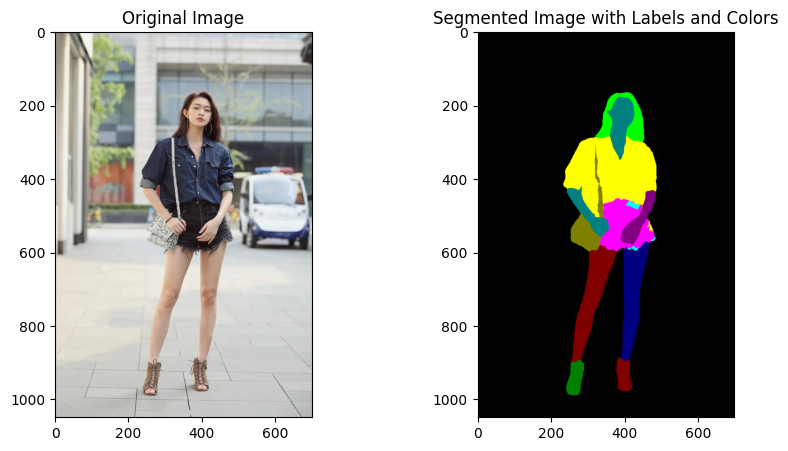

In [24]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch.nn as nn

# 創建類別到標籤的字典
class_labels = {
    0: "Background", 1: "Hat", 2: "Hair", 3: "Sunglasses",
    4: "Upper-clothes", 5: "Skirt", 6: "Pants", 7: "Dress",
    8: "Belt", 9: "Left-shoe", 10: "Right-shoe", 11: "Face",
    12: "Left-leg", 13: "Right-leg", 14: "Left-arm", 15: "Right-arm",
    16: "Bag", 17: "Scarf"
}

# 將類別到顏色的字典改為 RGB 數值
class_colors = {
    0: (0, 0, 0), 1: (255, 0, 0), 2: (0, 255, 0), 3: (0, 0, 255),
    4: (255, 255, 0), 5: (0, 255, 255), 6: (255, 0, 255), 7: (128, 0, 128),
    8: (128, 128, 0), 9: (128, 0, 0), 10: (0, 128, 0), 11: (0, 128, 128),
    12: (0, 0, 128), 13: (128, 0, 0), 14: (128, 0, 128), 15: (0, 128, 128),
    16: (128, 128, 0), 17: (255, 165, 0)
}

processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")

url = "https://k.sinaimg.cn/n/sinakd20210909ac/299/w1080h1619/20210909/6f24-ca6eb249ba908f5935b7516b424f42f1.jpg/w700d1q75cms.jpg"
image = Image.open(requests.get(url, stream=True).raw)
inputs = processor(images=image, return_tensors="pt")

outputs = model(**inputs)
logits = outputs.logits.cpu()

upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

pred_seg = upsampled_logits.argmax(dim=1)[0]

# 創建顯示的子圖
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# 顯示原始影像在左邊
ax1.imshow(image)
ax1.set_title("Original Image")

# 顯示分割結果在右邊，加入類別和顏色資訊
seg_color_map = [[class_colors[idx.item()] for idx in row] for row in pred_seg]
ax2.imshow(seg_color_map)
ax2.set_title("Segmented Image with Labels and Colors")

plt.show()


In [21]:
import pandas as pd
from IPython.display import HTML

# 將顏色轉換為 HTML 格式
color_html = [f"<div style='background-color:rgb{color}'>{label}</div>" for label, color in class_colors.items()]

# 將字典轉換成 DataFrame
data = {'Class Label': list(class_labels.values()), 'Color': color_html}
df = pd.DataFrame(data)

# 顯示 DataFrame
display(HTML(df.to_html(escape=False)))


,Class Label,Color
0,Background,0
1,Hat,1
2,Hair,2
3,Sunglasses,3
4,Upper-clothes,4
5,Skirt,5
6,Pants,6
7,Dress,7
8,Belt,8
9,Left-shoe,9
